In [1]:
%matplotlib inline
import os
import glob
import pandas
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

/Users/claymcleod/miniconda2/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
dataset = 'cifar10/deepcnet_small'
learning_rates = ['cs_0.15', 'cs_0.125', 'cs_0.175']
dfs = {}
for learning_rate in learning_rates:
    files = glob.glob('{}/{}/*.csv'.format(dataset, learning_rate))
    for f in files:
        bn = os.path.basename(f)
        df = pandas.read_csv(f)
        activation = bn.replace('cifar10', '').replace('deepcnet_small','').replace(learning_rate,'').replace('-', '').replace('.csv','').replace('scheduled', '')     
        activation = activation.replace('_(5)0.05_(inf)0.175', '').replace('_(5)0.05_(inf)0.15', '').replace('_(5)0.05_(inf)0.125','')
        df['activation'] = activation
        dfs[activation+'-'+learning_rate] = df
print('The available datasets are:')
for key in dfs.keys():
    print ("  - {}".format(key))

The available datasets are:
  - relu-cs_0.15
  - prelu-cs_0.175
  - mrelubiast-cs_0.125
  - mrelu-cs_0.175
  - prelu-cs_0.15
  - mrelubias-cs_0.125
  - prelu-cs_0.125
  - mrelubias-cs_0.175
  - mrelut-cs_0.175
  - mrelu-cs_0.15
  - mrelut-cs_0.15
  - mrelut-cs_0.125
  - mrelubias-cs_0.15
  - mrelubiast-cs_0.15
  - mrelu-cs_0.125
  - relu-cs_0.125
  - relu-cs_0.175
  - mrelubiast-cs_0.175


KeyError: 'mreluall-cs_0.175'

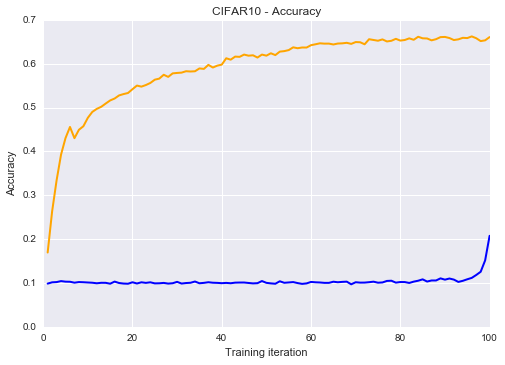

In [8]:
import itertools
lr = 'cs_0.175'
looking_at_axis = 'Accuracy'

def transform_name(name, la):
    post = ''
    if 'val' in la:
        post = '(val)'
    if name == 'mrelubias':
        return 'MReLU, WS 80-20 %s' % post
    elif name == 'mreluall':
        return 'MReLU, WS 100-0 %s' % post
    elif name == 'mrelu':
        return 'MReLU %s' % post
    elif name == 'relu':
        return 'ReLU %s' % post
    elif name == 'prelu':
        return 'PReLU %s' % post
    
    return name

looking_ats = ['acc']
styles = ['-']
widths = [2.0, 2.0]

activations = ['mrelu', 'mrelubias', 'mreluall', 'relu', 'prelu']
colors = ['b', '#ffa500', 'g', 'r', '#551a8b']

ls = zip(looking_ats, styles, widths)
ac = zip(activations, colors)

lsac = itertools.product(ls, ac)
handles = []
plt.title('CIFAR10 - Accuracy')
plt.xlabel('Training iteration')
plt.ylabel(looking_at_axis)
for ((la, style, width), (activation, color)) in lsac:
    y = dfs['{}-{}'.format(activation, lr)].head(100)[la]
    line, = plt.plot(range(1, len(y)+1), y, label=transform_name(activation, la),
                            color=color, linestyle=style, linewidth=width)
    handles.append(line)
plt.legend(handles=handles, loc='best')
plt.tight_layout()
plt.axis([1, 66, 0, 0.8])
plt.savefig('cifar10-{}.png'.format(looking_ats[0]))

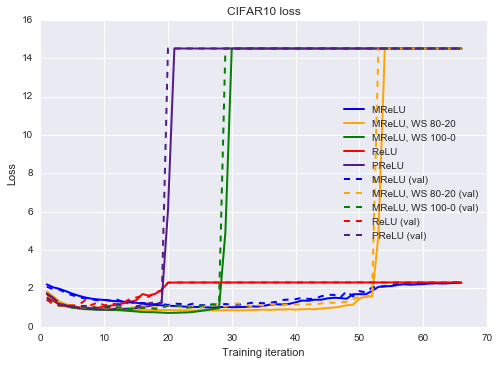

In [4]:
import itertools
lr = 'scheduled'
looking_at_axis = 'Loss'

def transform_name(name, la):
    post = ''
    if 'val' in la:
        post = '(val)'
    if name == 'mrelubias':
        return 'MReLU, WS 80-20 %s' % post
    elif name == 'mreluall':
        return 'MReLU, WS 100-0 %s' % post
    elif name == 'mrelu':
        return 'MReLU %s' % post
    elif name == 'relu':
        return 'ReLU %s' % post
    elif name == 'prelu':
        return 'PReLU %s' % post
    
    return name

looking_ats = ['loss', 'val_loss']
styles = ['-', '--']
widths = [2.0, 2.0]

activations = ['mrelu', 'mrelubias', 'mreluall', 'relu', 'prelu']
colors = ['b', '#ffa500', 'g', 'r', '#551a8b']

ls = zip(looking_ats, styles, widths)
ac = zip(activations, colors)

lsac = itertools.product(ls, ac)
handles = []
plt.title('CIFAR10 loss')
plt.xlabel('Training iteration')
plt.ylabel(looking_at_axis)
for ((la, style, width), (activation, color)) in lsac:
    y = dfs['{}-{}'.format(activation, lr)].head(100)[la]
    line, = plt.plot(range(1, len(y)+1), y, label=transform_name(activation, la),
                            color=color, linestyle=style, linewidth=width)
    handles.append(line)
plt.legend(handles=handles, loc='best')
plt.savefig('cifar10-{}-and-{}.png'.format(looking_ats[0], looking_ats[1]))

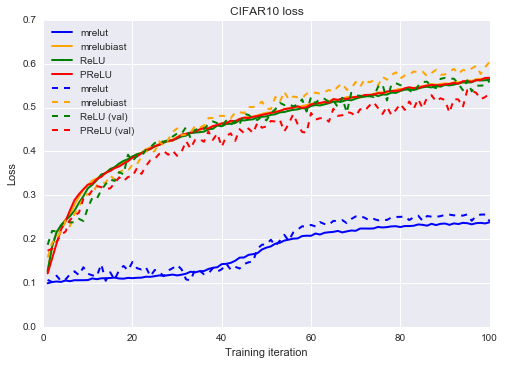

In [17]:
import itertools
lr = '0.001'
looking_at_axis = 'Loss'

def transform_name(name, la):
    post = ''
    if 'val' in la:
        post = '(val)'
    if name == 'mrelubias':
        return 'MReLU, WS 80-20 %s' % post
    elif name == 'mreluall':
        return 'MReLU, WS 100-0 %s' % post
    elif name == 'mrelu':
        return 'MReLU %s' % post
    elif name == 'relu':
        return 'ReLU %s' % post
    elif name == 'prelu':
        return 'PReLU %s' % post
    
    return name

looking_ats = ['acc', 'val_acc']
styles = ['-', '--']
widths = [2.0, 2.0]

activations = ['mrelut', 'mrelubiast', 'relu', 'prelu']
colors = ['b', '#ffa500', 'g', 'r', '#551a8b']

ls = zip(looking_ats, styles, widths)
ac = zip(activations, colors)

lsac = itertools.product(ls, ac)
handles = []
plt.title('CIFAR10 loss')
plt.xlabel('Training iteration')
plt.ylabel(looking_at_axis)
for ((la, style, width), (activation, color)) in lsac:
    y = dfs['{}-{}'.format(activation, lr)].head(100)[la]
    line, = plt.plot(range(1, len(y)+1), y, label=transform_name(activation, la),
                            color=color, linestyle=style, linewidth=width)
    handles.append(line)
plt.legend(handles=handles, loc='best')
plt.savefig('cifar10-{}-and-{}-lr-{}.png'.format(looking_ats[0], looking_ats[1], lr))

In [43]:
dataset = 'cifar10/deepcnet_small'
learning_rates = ['0.1', '0.01', '0.001', '0.5', '0.05', '0.005', '0.125', '0.15', '0.2', '0.25', '0.3', '0.5']
activations = ['relu', 'prelu', 'mrelu', 'mrelubias', 'mrelu-t', 'mrelubias-t']
dfs = {}

looking_at = 'val_acc'
rows = []

for learning_rate in sorted(learning_rates):
    lr_max = 0
    lr_row = []
    
    for activation in activations:
        f = '{}/{}/cifar10-deepcnet_small-{}-{}.csv'.format(dataset, learning_rate, activation, learning_rate)
        bn = os.path.basename(f)
        df = pandas.read_csv(f)
        curr_max = df[looking_at].max()
        idx = df[df[looking_at] == curr_max].index.tolist()
        lr_row.append('{} ({})'.format(curr_max, min(idx)))
        if curr_max > lr_max:
            lr_max = curr_max
            
    if lr_max <= 0.15:
        print("LR {} is probably not good...".format(learning_rate))
    else:
        rows.append([learning_rate] + lr_row)

from tabulate import tabulate
print(tabulate(rows, [''] + activations, tablefmt="latex"))
            

LR 0.15 is probably not good...
LR 0.2 is probably not good...
LR 0.25 is probably not good...
LR 0.3 is probably not good...
LR 0.5 is probably not good...
LR 0.5 is probably not good...
\begin{tabular}{rllllll}
\hline
       & relu        & prelu       & mrelu       & mrelubias   & mrelu-t     & mrelubias-t   \\
\hline
 0.001 & 0.5676 (89) & 0.5397 (94) & 0.2443 (90) & 0.5741 (96) & 0.2564 (94) & 0.6041 (99)   \\
 0.005 & 0.7223 (93) & 0.7301 (97) & 0.3357 (99) & 0.7043 (96) & 0.3604 (99) & 0.7031 (96)   \\
 0.01  & 0.7396 (94) & 0.7485 (99) & 0.5061 (99) & 0.7381 (82) & 0.4448 (98) & 0.7399 (99)   \\
 0.05  & 0.6872 (82) & 0.7478 (99) & 0.6544 (99) & 0.7453 (98) & 0.5705 (98) & 0.7238 (95)   \\
 0.1   & 0.4995 (49) & 0.7067 (81) & 0.3705 (99) & 0.7084 (85) & 0.1385 (31) & 0.6609 (89)   \\
 0.125 & 0.1 (0)     & 0.6988 (97) & 0.6047 (98) & 0.1 (0)     & 0.3627 (99) & 0.6029 (36)   \\
\hline
\end{tabular}


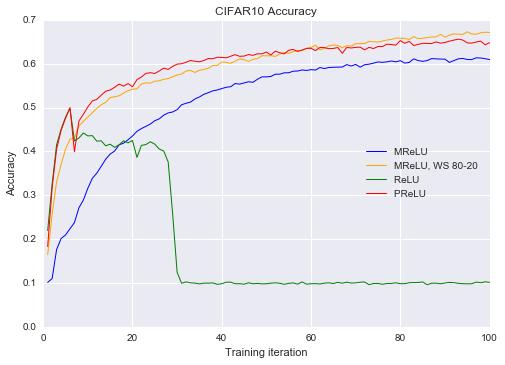

In [10]:
import itertools
lr = 'cs_0.125'
looking_at_axis = 'Accuracy'

def transform_name(name, la):
    post = ''
    if 'val' in la:
        post = '(val)'
    if name == 'mrelubias':
        return 'MReLU, WS 80-20 %s' % post
    elif name == 'mreluall':
        return 'MReLU, WS 100-0 %s' % post
    elif name == 'mrelu':
        return 'MReLU %s' % post
    elif name == 'relu':
        return 'ReLU %s' % post
    elif name == 'prelu':
        return 'PReLU %s' % post
    
    return name

looking_ats = ['acc']
styles = ['-']
widths = [1.0]

activations = ['mrelu', 'mrelubias', 'relu', 'prelu']
colors = ['b', '#ffa500', 'g', 'r', '#551a8b']

ls = zip(looking_ats, styles, widths)
ac = zip(activations, colors)

lsac = itertools.product(ls, ac)
handles = []
plt.title('CIFAR10 Accuracy')
plt.xlabel('Training iteration')
plt.ylabel(looking_at_axis)
for ((la, style, width), (activation, color)) in lsac:
    y = dfs['{}-{}'.format(activation, lr)].head(100)[la]
    line, = plt.plot(range(1, len(y)+1), y, label=transform_name(activation, la),
                            color=color, linestyle=style, linewidth=width)
    handles.append(line)
plt.legend(handles=handles, loc='best')
plt.savefig('cifar10-{}-lr-{}.png'.format(looking_ats[0], lr))

In [11]:
dataset = 'cifar10/deepcnet_small'
learning_rates = ['cs_0.15', 'cs_0.125', 'cs_0.175']
activations = ['relu', 'prelu', 'mrelu', 'mrelubias', 'mrelu-t', 'mrelubias-t']
dfs = {}

looking_at = 'val_acc'
rows = []

for learning_rate in sorted(learning_rates):
    lr_max = 0
    lr_row = []
    
    for activation in activations:
        f = '{}/{}/{}.csv'.format(dataset, learning_rate, activation, learning_rate)
        bn = os.path.basename(f)
        df = pandas.read_csv(f)
        curr_max = df[looking_at].max()
        idx = df[df[looking_at] == curr_max].index.tolist()
        lr_row.append('{} ({})'.format(curr_max, min(idx)))
        if curr_max > lr_max:
            lr_max = curr_max
            
    if lr_max <= 0.15:
        print("LR {} is probably not good...".format(learning_rate))
    else:
        rows.append([learning_rate] + lr_row)

from tabulate import tabulate
print(tabulate(rows, [''] + activations, tablefmt="latex"))
            

\begin{tabular}{lllllll}
\hline
          & relu       & prelu       & mrelu       & mrelubias   & mrelu-t     & mrelubias-t   \\
\hline
 cs\_0.125 & 0.5299 (4) & 0.7172 (98) & 0.6334 (65) & 0.6751 (93) & 0.6274 (80) & 0.678 (98)    \\
 cs\_0.15  & 0.5378 (5) & 0.5618 (5)  & 0.1669 (66) & 0.6523 (99) & 0.1028 (4)  & 0.6674 (88)   \\
 cs\_0.175 & 0.5517 (5) & 0.5741 (55) & 0.2486 (99) & 0.6798 (94) & 0.1086 (3)  & 0.6283 (64)   \\
\hline
\end{tabular}
